In [1]:
from models.vae import *
from config import mnist_configs
from QAVI import Gaus_QAVI, Mix_QAVI, Flow_QAVI
from data import *

#Load configs from MNIST
configs = mnist_configs()

#Load fully-observed training data
train_loader = dataset_loader()
print("training set loaded")

#Load pre-trained VAE, train with training data if not available
vae = load_baseVAE("mnist", configs, train_loader)
print("pre-trained VAE loaded")

#Load test loader for patches missing data
miss_string = "rotating_half"
test_data = dataset_loader(batch_size=100, miss_string=miss_string, mode="test")
print("test set (patches) loaded")

#Create gaus object for inference with a Gaussian posterior
'''
Using Gaussian posterior
'''
gaus = Gaus_QAVI(configs, test_data)
gaus.show_imputations(test_data, miss_string)
gaus.evaluate(test_data, miss_string)


Loaded from permuted data
training set loaded
pre-trained VAE loaded
Loaded from permuted data
test set (patches) loaded


'\ngaus = Gaus_QAVI(configs, test_data)\ngaus.show_imputations(test_data, miss_string)\ngaus.evaluate(test_data, miss_string)\n\n'

0
0 2415.61328125
50 -623.2671508789062
100 -642.8834838867188
150 -652.3389282226562
200 -657.4635009765625
250 -656.1625366210938
1
0 2552.5185546875
50 -695.67822265625
100 -715.95654296875
150 -720.3043823242188
200 -722.9605712890625
250 -727.443603515625
2
0 1652.247314453125
50 -685.759033203125
100 -704.3034057617188
150 -707.6785278320312
200 -711.3907470703125
250 -711.1375122070312
3
0 1216.5174560546875
50 -630.9625854492188
100 -647.5066528320312
150 -655.6488647460938
200 -659.1594848632812
250 -658.3197021484375
4
0 2548.858154296875
50 -607.5936889648438
100 -628.4573364257812
150 -638.2012939453125
200 -642.5313110351562
250 -643.94384765625
5
0 2882.693115234375
50 -651.6070556640625
100 -670.3207397460938
150 -678.9568481445312
200 -686.7019653320312
250 -689.59912109375
6
0 1621.4857177734375
50 -610.9853515625
100 -631.7252807617188
150 -636.9078979492188
200 -638.142578125
250 -640.1574096679688
7
0 2789.457763671875
50 -648.0619506835938
100 -667.9351806640625
15

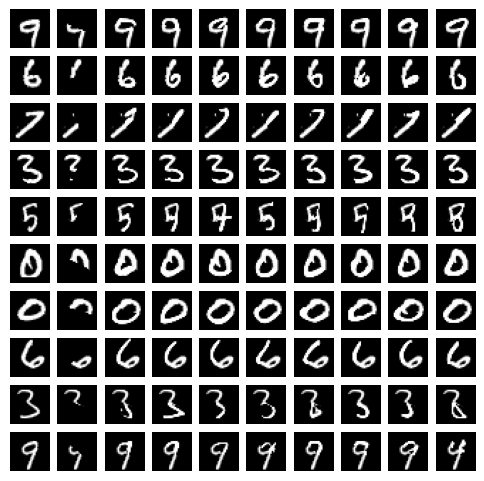

Computing IWAE
IWAE:  2.3158060502606537
parameters available, reading file instead of training
Displaying imputations for 10 test data points


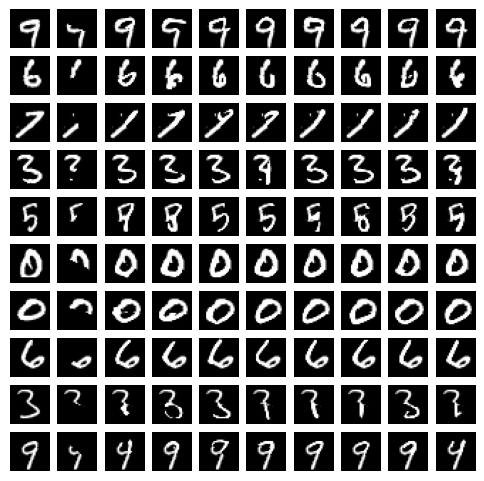

evaluations are available, reading file instead of computing
IWAE:  2.3087608790767384


In [2]:
'''
Using Flow posterior
'''

flow = Flow_QAVI(configs, test_data)
flow.show_imputations(test_data, miss_string)
flow.evaluate(test_data, miss_string)


In [ ]:
'''
Using Mixture posterior
'''

mix = Mix_QAVI(configs, test_data)
mix.show_imputations(test_data, miss_string)
mix.evaluate(test_data, miss_string)